# Figures
Visualize the results of the analyses for the indices paper

In [2]:
import os
import pickle as pkl
import string
import sys
from glob import glob

import numpy as np
import pandas as pd
import svgutils.transform as sg
from plotnine import *
from svgutils.compose import SVG, Figure, Panel, Text

sys.path.append('../indices')
from utils import load_percentile_data, load_journal_data, load_single_heading, parse_metadata

In [47]:
headings = [('nanotechnology', 'microscopy'), ('immunochemistry', 'anatomy'), 
            ('proteomics', 'metabolomics'), ('computational_biology', 'human_genetics')]

In [3]:
for heading1, heading2 in headings:
    percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
    
    hist_data = percentile_data.melt(id_vars='doi', value_vars=[f'{heading1}_pagerank', f'{heading2}_pagerank'],
                                     value_name='PageRank',)
    
    h1 = string.capwords(heading1.replace('_', ' '))
    h2 = string.capwords(heading2.replace('_', ' '))
    
    new_names = {f'{heading1}_pagerank': f'{h1}',
                 f'{heading2}_pagerank': f'{h2}'}
    
    hist_data['Field'] = hist_data['variable'].map(new_names)
        
    plot = ggplot(hist_data, aes(x='PageRank', fill='Field'))
    plot += geom_histogram(position='identity', alpha=.7)
    plot += scale_x_log10()
    plot += scale_y_continuous(name='Count')
    plot += ggtitle(f'{h1} and {h2} Pagerank Distribution')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading1}-{heading2}-hist.svg')

    plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank',))
    plot += geom_bin2d()
    plot += scale_x_log10(name=f'{h1} Pagerank')
    plot += scale_y_log10(name=f'{h2} Pagerank')
    plot += ggtitle(f'{h1} vs {h2} Pageranks')
    plot += scale_fill_gradient(trans='log')
    plot += theme_classic()

    ggsave(plot, f'../figures/{heading1}-{heading2}-heatmap.svg')
    


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-microscopy-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 41'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-microscopy-heatmap.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/mizani/formatters.py:499: UserWarning: Formating values as base = 10
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: S

## Create annotated difference plots

In [65]:
heading1 = 'nanotechnology'
heading2 = 'microscopy'

h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

title1 = 'A robust DNA mechanical device controlled'
title2 = 'Bioadhesive poly'
title3 = 'DNA-templated self-assembly of protein arrays'
title4 = 'Photostable luminescent nanoparticles '
title5 = 'WSXM: a software for scanning'
title6 = 'Measuring distances in supported bilayers'
title7 = 'Toward fluorescence'
title8 = 'In vivo imaging of quantum dots encapsulated'
title9 = 'Water-soluble quantum dots'

percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data[f'{heading1}-{heading2}'] *= 100
percentile_data = percentile_data.rename({f'{heading1}-{heading2}': f'{h1}-{h2}'}, axis=1)
t1_row = percentile_data[percentile_data['title'].str.contains(title1)]
t2_row = percentile_data[percentile_data['title'].str.contains(title2)]
t3_row = percentile_data[percentile_data['title'].str.contains(title3)]
t4_row = percentile_data[percentile_data['title'].str.contains(title4)]
t5_row = percentile_data[percentile_data['title'].str.contains(title5)]
t6_row = percentile_data[percentile_data['title'].str.contains(title6)]
t7_row = percentile_data[percentile_data['title'].str.contains(title7)]
t8_row = percentile_data[percentile_data['title'].str.contains(title8)]
t9_row = percentile_data[percentile_data['title'].str.contains(title9)]

In [66]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
plot += annotate('text', label='1', 
                 x=t1_row[f'{heading1}_pagerank'], y=t1_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='2', 
                 x=t2_row[f'{heading1}_pagerank'], y=t2_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='3', 
                 x=t3_row[f'{heading1}_pagerank'], y=t3_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='4', 
                 x=t4_row[f'{heading1}_pagerank'], y=t4_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='5', 
                 x=t5_row[f'{heading1}_pagerank'], y=t5_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='6', 
                 x=t6_row[f'{heading1}_pagerank'], y=t6_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='7', 
                 x=t7_row[f'{heading1}_pagerank'], y=t7_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='8', 
                 x=t8_row[f'{heading1}_pagerank'], y=t8_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='9', 
                 x=t9_row[f'{heading1}_pagerank'], y=t9_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += theme_classic()
plot
ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-microscopy-difference.svg


In [6]:
heading1 = 'immunochemistry'
heading2 = 'anatomy'

h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

title1 = 'Immunoelectron microscopic exploration'
title2 = 'expression in cat posterior temporalis muscle during postnatal development'
title3 = 'Electron microscopic demonstration of calcitonin in human'
title4 = 'Grafting genetically modified cells into the rat brain:'
title5 = 'Vitamin-D-dependent calcium-binding-protein and parvalbumin'
title6 = 'Mapping of brain areas containing RNA homologous to cDNAs'
title7 = 'Studies of the HER-2/neu proto-oncogene'
title8 = 'Expression of c-fos protein in brain'
title9 = 'immunolocalization in paraffin sections:'

percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data[f'{heading1}-{heading2}'] *= 100
percentile_data = percentile_data.rename({f'{heading1}-{heading2}': f'{h1}-{h2}'}, axis=1)
t1_row = percentile_data[percentile_data['title'].str.contains(title1)]
t2_row = percentile_data[percentile_data['title'].str.contains(title2)]
t3_row = percentile_data[percentile_data['title'].str.contains(title3)]
t4_row = percentile_data[percentile_data['title'].str.contains(title4)]
t5_row = percentile_data[percentile_data['title'].str.contains(title5)]
t6_row = percentile_data[percentile_data['title'].str.contains(title6)]
t7_row = percentile_data[percentile_data['title'].str.contains(title7)]
t8_row = percentile_data[percentile_data['title'].str.contains(title8)]
t9_row = percentile_data[percentile_data['title'].str.contains(title9)]

In [7]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
plot += annotate('text', label='21', 
                 x=t1_row[f'{heading1}_pagerank'], y=t1_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t2_row[f'{heading1}_pagerank'], y=t2_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t3_row[f'{heading1}_pagerank'], y=t3_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t4_row[f'{heading1}_pagerank'], y=t4_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t5_row[f'{heading1}_pagerank'], y=t5_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t6_row[f'{heading1}_pagerank'], y=t6_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t7_row[f'{heading1}_pagerank'], y=t7_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t8_row[f'{heading1}_pagerank'], y=t8_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t9_row[f'{heading1}_pagerank'], y=t9_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += theme_classic()
ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/immunochemistry-anatomy-difference.svg


In [8]:
heading1 = 'proteomics'
heading2 = 'metabolomics'

h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

title1 = 'Proteomics Standards Initiative:'
title2 = 'Limited Environmental Serine and Glycine'
title3 = 'A high-throughput processing service for retention'
title4 = 'MeltDB: a software platform for the analysis'
title5 = 'In silico fragmentation for computer assisted identification'
title6 = 'The metabonomic signature of celiac'
title7 = 'Visualization of omics data for systems biology'
title8 = 'FunRich: An open access standalone functional'
title9 = 'Proteomic and Metabolomic Characterization of COVID-19 Patient Sera'

percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data[f'{heading1}-{heading2}'] *= 100
percentile_data = percentile_data.rename({f'{heading1}-{heading2}': f'{h1}-{h2}'}, axis=1)
t1_row = percentile_data[percentile_data['title'].str.contains(title1)]
t2_row = percentile_data[percentile_data['title'].str.contains(title2)]
t3_row = percentile_data[percentile_data['title'].str.contains(title3)]
t4_row = percentile_data[percentile_data['title'].str.contains(title4)]
t5_row = percentile_data[percentile_data['title'].str.contains(title5)]
t6_row = percentile_data[percentile_data['title'].str.contains(title6)]
t7_row = percentile_data[percentile_data['title'].str.contains(title7)]
t8_row = percentile_data[percentile_data['title'].str.contains(title8)]
t9_row = percentile_data[percentile_data['title'].str.contains(title9)]

In [9]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
plot += annotate('text', label='21', 
                 x=t1_row[f'{heading1}_pagerank'], y=t1_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t2_row[f'{heading1}_pagerank'], y=t2_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t3_row[f'{heading1}_pagerank'], y=t3_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t4_row[f'{heading1}_pagerank'], y=t4_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t5_row[f'{heading1}_pagerank'], y=t5_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t6_row[f'{heading1}_pagerank'], y=t6_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t7_row[f'{heading1}_pagerank'], y=t7_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t8_row[f'{heading1}_pagerank'], y=t8_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t9_row[f'{heading1}_pagerank'], y=t9_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += theme_classic()

ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/proteomics-metabolomics-difference.svg


In [70]:
heading1 = 'computational_biology'
heading2 = 'human_genetics'

h1 = string.capwords(heading1.replace('_', ' '))
h2 = string.capwords(heading2.replace('_', ' '))

title1 = 'Development of human protein reference'
title2 = 'A database for post-genome analysis'
title3 = 'Use of mass spectrometry-derived data'
title4 = 'Genetic discrimination: perspectives'
title5 = 'Committee Opinion No. 690:'
title6 = 'Public health genomics: the end'
title7 = 'Initial sequencing and analysis of the human genome'
title8 = 'An STS-based map of the human genome'
title9 = 'A new five-year plan'

percentile_data = load_percentile_data(heading1, heading2, base_dir='../viz_dataframes')
percentile_data[f'{heading1}-{heading2}'] *= 100
percentile_data = percentile_data.rename({f'{heading1}-{heading2}': f'{h1}-{h2}'}, axis=1)
t1_row = percentile_data[percentile_data['title'].str.contains(title1)]
t2_row = percentile_data[percentile_data['title'].str.contains(title2)]
t3_row = percentile_data[percentile_data['title'].str.contains(title3)]
t4_row = percentile_data[percentile_data['title'].str.contains(title4)]
t5_row = percentile_data[percentile_data['title'].str.contains(title5)]
t6_row = percentile_data[percentile_data['title'].str.contains(title6)]
t7_row = percentile_data[percentile_data['title'].str.contains(title7)]
t8_row = percentile_data[percentile_data['title'].str.contains(title8)]
t9_row = percentile_data[percentile_data['title'].str.contains(title9)]
print(t6_row)

                               doi  human_genetics_pagerank  \
1168  10.1097/gim.0b013e31821024ca                 0.000282   

      human_genetics_percentile  human_genetics_count  \
1168                        1.0                  59.0   

      computational_biology_pagerank  computational_biology_percentile  \
1168                        0.000002                              0.23   

      computational_biology_count  human_genetics-computational_biology  \
1168                          100                                  0.77   

      Computational Biology-Human Genetics      pmid pmcid    journal  \
1168                                 -77.0  21311338  None  Genet Med   

                                                  title  
1168  Public health genomics: the end of the beginning.  


In [60]:
plot = ggplot(percentile_data, aes(x=f'{heading1}_pagerank', y=f'{heading2}_pagerank', 
              color=f'{h1}-{h2}'))
plot += geom_point()
plot += scale_x_log10(name=f'{h1} Pagerank')
plot += scale_y_log10(name=f'{h2} Pagerank')
plot += ggtitle(f'{h1} and {h2} Percentile Difference')
plot += scale_color_gradient2(low='purple', mid='#e2e2e2', high='green')
plot += annotate('text', label='21', 
                 x=t1_row[f'{heading1}_pagerank'], y=t1_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t2_row[f'{heading1}_pagerank'], y=t2_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t3_row[f'{heading1}_pagerank'], y=t3_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t4_row[f'{heading1}_pagerank'], y=t4_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t5_row[f'{heading1}_pagerank'], y=t5_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t6_row[f'{heading1}_pagerank'], y=t6_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t7_row[f'{heading1}_pagerank'], y=t7_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t8_row[f'{heading1}_pagerank'], y=t8_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += annotate('text', label='21', 
                 x=t9_row[f'{heading1}_pagerank'], y=t9_row[f'{heading2}_pagerank'], ha='right', va='bottom')
plot += theme_classic()
ggsave(plot, f'../figures/{heading1}-{heading2}-difference.svg')

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/computational_biology-human_genetics-difference.svg


## Combine histograms

In [12]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-hist.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-hist.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-hist.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-hist.svg'

y_2 = 310
x_2 = 520

fig = Figure("1080", "636",
       Panel(
          SVG(plot1),
          Text("A", 0, 40, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 20, 40, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 0, 50, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 20, 50, size=30).move(x_2-20, y_2),
          )
       )
fig.save('../figures/combined_histogram.svg')

In [13]:
!inkscape --export-dpi 200 --export-png=../figures/combined_histogram.png ../figures/combined_histogram.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1080:636 exported to 2250 x 1325 pixels (200 dpi)
Bitmap saved as: ../figures/combined_histogram.png


## Combine heatmaps

In [14]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-heatmap.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-heatmap.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-heatmap.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-heatmap.svg'

y_2 = 325
x_2 = 500

fig = Figure("1007", "656",
       Panel(
          SVG(plot1),
          Text("A", 25, 20, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 20, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 25, 20, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 25, 20, size=30).move(x_2-20, y_2),
          )
       )
fig.save('../figures/combined_heatmap.svg')

In [15]:
!inkscape --export-dpi 200 --export-png=../figures/combined_heatmap.png ../figures/combined_heatmap.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1007:656 exported to 2098 x 1367 pixels (200 dpi)
Bitmap saved as: ../figures/combined_heatmap.png


## Combine percentile plots

In [67]:
plot1 = f'../figures/{headings[0][0]}-{headings[0][1]}-difference.svg'
plot2 = f'../figures/{headings[1][0]}-{headings[1][1]}-difference.svg'
plot3 = f'../figures/{headings[2][0]}-{headings[2][1]}-difference.svg'
plot4 = f'../figures/{headings[3][0]}-{headings[3][1]}-difference.svg'

y_2 = 325
x_2 = 630

fig = Figure("1300", "656",
       Panel(
          SVG(plot1),
          Text("A", 15, 30, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 30, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(0, y_2),
          Text("C", 15, 30, size=30).move(0, y_2-25),
          ),
       Panel(
          SVG(plot4).move(x_2, y_2),
          Text("D", 25, 30, size=30).move(x_2-20, y_2-25),
          )
       )
fig.save('../figures/combined_difference.svg')

In [68]:
!inkscape --export-dpi 200 --export-png=../figures/combined_difference.png ../figures/combined_difference.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1300:656 exported to 2708 x 1367 pixels (200 dpi)
Bitmap saved as: ../figures/combined_difference.png


## Build journal plots

In [18]:
with open('../viz_dataframes/journals/nanotechnology-microscopy.pkl', 'rb') as in_file:
    nanotech_df = pkl.load(in_file)
nanotech_df.head()
science_row = nanotech_df[nanotech_df['journal_title'] == 'Science']
science_x_loc = science_row['nanotechnology_pagerank']
science_y_loc = science_row['microscopy_pagerank']

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/microscopy_journals.svg


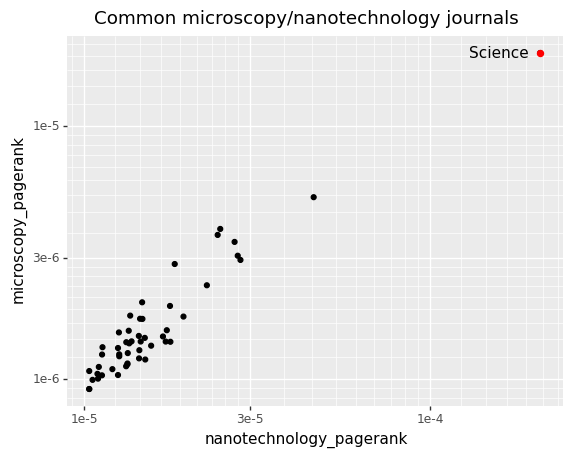

<ggplot: (8740113367098)>

In [19]:
plot = ggplot(nanotech_df, aes(x='nanotechnology_pagerank', y='microscopy_pagerank'))
plot += geom_point()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle('Common microscopy/nanotechnology journals')
plot += annotate('text', x=science_x_loc - 5e-5, y=science_y_loc, label='Science',)
plot += annotate('point', x=science_x_loc, y=science_y_loc, fill='red', size=2, color='red')
ggsave(plot, '../figures/microscopy_journals.svg')
plot

In [20]:
with open('../viz_dataframes/journals/immunochemistry-anatomy.pkl', 'rb') as in_file:
    immunochem_df = pkl.load(in_file)
immunochem_df.head()
science_row = immunochem_df[immunochem_df['journal_title'] == 'Science']
science_x_loc = science_row['immunochemistry_pagerank']
science_y_loc = science_row['anatomy_pagerank']

In [21]:
nature_row = immunochem_df[immunochem_df['journal_title'] == 'Nature']
nature_x_loc = nature_row['immunochemistry_pagerank']
nature_y_loc = nature_row['anatomy_pagerank']

In [22]:
cell_row = immunochem_df[immunochem_df['journal_title'] == 'Cell']
cell_x_loc = cell_row['immunochemistry_pagerank']
cell_y_loc = cell_row['anatomy_pagerank']

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/immunochemistry_journals.svg


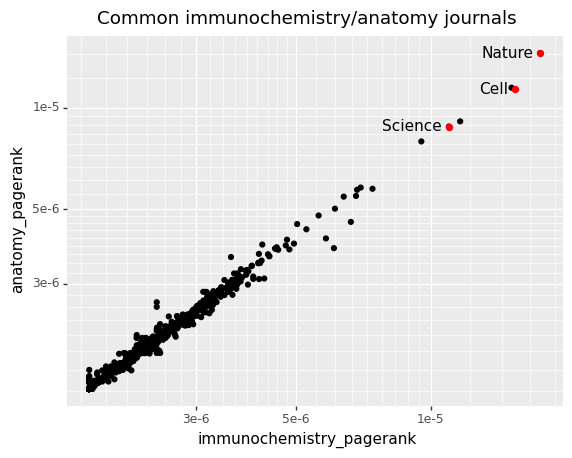

<ggplot: (8740105600652)>

In [23]:
plot = ggplot(immunochem_df, aes(x='immunochemistry_pagerank', y='anatomy_pagerank'))
plot += geom_point()
plot += scale_x_log10()
plot += scale_y_log10()
plot += ggtitle('Common immunochemistry/anatomy journals')
plot += annotate('text', x=science_x_loc - 1.9e-6, y=science_y_loc, label='Science',)
plot += annotate('point', x=science_x_loc, y=science_y_loc, fill='red', size=2, color='red')
plot += annotate('text', x=nature_x_loc - 2.7e-6, y=nature_y_loc, label='Nature',)
plot += annotate('point', x=nature_x_loc, y=nature_y_loc, fill='red', size=2, color='red')
plot += annotate('text', x=cell_x_loc - 1.6e-6, y=cell_y_loc, label='Cell',)
plot += annotate('point', x=cell_x_loc, y=cell_y_loc, fill='red', size=2, color='red')
ggsave(plot, '../figures/immunochemistry_journals.svg')
plot

## Combine journal plots

In [24]:
plot1 = f'../figures/microscopy_journals.svg'
plot2 = f'../figures/immunochemistry_journals.svg'

y_2 = 325
x_2 = 415

fig = Figure("828", "331",
       Panel(
          SVG(plot1),
          Text("A", 25, 20, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 25, 20, size=30).move(x_2-20, 0),
          ),
       )
fig.save('../figures/combined_journals.svg')

In [25]:
!inkscape --export-dpi 200 --export-png=../figures/combined_journals.png ../figures/combined_journals.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:828:331 exported to 1725 x 690 pixels (200 dpi)
Bitmap saved as: ../figures/combined_journals.png


## Create per-field distribution plots

In [26]:
for heading1, heading2 in headings:
    with open(f'../output/{heading1}-{heading2}-pagerank.pkl', 'rb') as in_file:
        h1_dict = pkl.load(in_file)
        h1_df = pd.DataFrame.from_dict(h1_dict, orient='index', columns=['pagerank'])
    with open(f'../output/{heading2}-{heading1}-pagerank.pkl', 'rb') as in_file:
        h2_dict = pkl.load(in_file)
        h2_df = pd.DataFrame.from_dict(h2_dict, orient='index', columns=['pagerank'])
    
    h1_text = string.capwords(heading1.replace('_', ' '))
    h2_text = string.capwords(heading2.replace('_', ' '))
    
    plot = ggplot(h1_df, aes(x='pagerank'))
    plot += geom_histogram()
    plot += ggtitle(f'{h1_text} PageRank Distribution')
    plot += scale_x_log10(name='PageRank')
    plot += scale_y_continuous(name='Count')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading1}-hist.svg')
    
    plot = ggplot(h2_df, aes(x='pagerank'))
    plot += geom_histogram()
    plot += ggtitle(f'{h2_text} PageRank Distribution')
    plot += scale_x_log10(name='PageRank')
    plot += scale_y_continuous(name='Count')
    plot += theme_classic()
    ggsave(plot, f'../figures/{heading2}-hist.svg')
    

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/nanotechnology-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 140'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/microscopy-hist.svg
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 322'. Pick better value with 'binwidth'.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718:

In [27]:
plot1 = f'../figures/{headings[0][0]}-hist.svg'
plot5 = f'../figures/{headings[0][1]}-hist.svg'
plot2 = f'../figures/{headings[1][0]}-hist.svg'
plot6 = f'../figures/{headings[1][1]}-hist.svg'
plot3 = f'../figures/{headings[2][0]}-hist.svg'
plot7 = f'../figures/{headings[2][1]}-hist.svg'
plot4 = f'../figures/{headings[3][0]}-hist.svg'
plot8 = f'../figures/{headings[3][1]}-hist.svg'

y_2 = 325
x_2 = 420
x_3 = 840
x_4 = 1260

fig = Figure("1693", "654",
       Panel(
          SVG(plot1),
          Text("A", 0, 30, size=30),
          ),
       Panel(
          SVG(plot2).move(x_2, 0),
          Text("B", 20, 30, size=30).move(x_2-20, 0),
          ),
       Panel(
          SVG(plot3).move(x_3, 0),
          Text("C", 0, 30, size=30).move(x_3, 0)
          ),
       Panel(
          SVG(plot4).move(x_4, 0),
          Text("D", 20, 30, size=30).move(x_4, 0),
          ),
       Panel(
          SVG(plot5).move(0, y_2),
          Text("E", 0, 30, size=30).move(0, y_2),
          ),
       Panel(
          SVG(plot6).move(x_2, y_2),
          Text("F", 20, 30, size=30).move(x_2-20, y_2),
          ),
       Panel(
          SVG(plot7).move(x_3, y_2),
          Text("G", 0, 30, size=30).move(x_3, y_2),
          ),
       Panel(
          SVG(plot8).move(x_4, y_2),
          Text("H", 20, 30, size=30).move(x_4, y_2),
          ),
     )

fig.save('../figures/per-field.svg')

In [28]:
!inkscape  --export-dpi 200 --export-png=../figures/per-field.png ../figures/per-field.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:1693:654 exported to 3527 x 1363 pixels (200 dpi)
Bitmap saved as: ../figures/per-field.png


## Specialty journal analysis

In [29]:
output_files = glob('../output/*-*-pagerank.pkl')
print(len(output_files))

1980


In [30]:
journal_info = {'journal': [], 'count': [], 'field': []}
headings_seen = set()

for file in output_files:
    heading = os.path.basename(file).split('-')[0]
    if heading in headings_seen:
        continue
    else:
        headings_seen.add(heading)
    
    with open(file, 'rb') as in_file:
        heading_dict = pkl.load(in_file)
    pagerank_df = pd.DataFrame.from_dict(heading_dict, orient='index', columns=['pagerank'])
    pagerank_df = pagerank_df.reset_index()
    pagerank_df = pagerank_df.rename({'index': 'doi'}, axis='columns')
    
    
    metadata_path = f'../data/pubmed/efetch/{heading}.xml.xz'
    metadata = parse_metadata(metadata_path)
    
    doi_to_journal = dict(zip(metadata['doi'], metadata['journal']))
    
    pagerank_df['journal'] = pagerank_df['doi'].map(doi_to_journal)
    for journal, count in pagerank_df['journal'].value_counts().iteritems():
        journal_info['journal'].append(journal)
        journal_info['count'].append(count)
        journal_info['field'].append(heading)

In [31]:
journal_df = pd.DataFrame(journal_info)
journal_df

,journal,count,field
0,Brain Res,6342,histocytochemistry
1,Neuroscience,4569,histocytochemistry
2,PLoS One,4510,histocytochemistry
3,J Comp Neurol,4496,histocytochemistry
4,J Histochem Cytochem,4428,histocytochemistry
...,...,...,...
89853,J Immunotoxicol,1,crystallography
89854,Pathol Biol (Paris),1,crystallography
89855,Cancer Sci,1,crystallography
89856,Biogr Mem Fellows R Soc,1,crystallography


In [32]:
journal_df['field'].nunique()

45

In [33]:
# There are 5178 journals with at least 100 articles in the dataset
(journal_df.groupby('journal').sum() > 50 ).sum()

count    5178
dtype: int64

In [34]:
journal_series = journal_df.groupby('journal').sum() > 50 
common_journals = set(journal_series[journal_series['count']].index)

In [35]:
common_journal_df = journal_df.loc[journal_df['journal'].isin(common_journals)]
common_journal_df

,journal,count,field
0,Brain Res,6342,histocytochemistry
1,Neuroscience,4569,histocytochemistry
2,PLoS One,4510,histocytochemistry
3,J Comp Neurol,4496,histocytochemistry
4,J Histochem Cytochem,4428,histocytochemistry
...,...,...,...
89852,J Tongji Med Univ,1,crystallography
89853,J Immunotoxicol,1,crystallography
89854,Pathol Biol (Paris),1,crystallography
89855,Cancer Sci,1,crystallography


In [36]:
journal_total_articles = common_journal_df.groupby('journal').sum()['count']
journal_total_articles

journal
A A Case Rep           100
A A Pract              114
AACN Adv Crit Care     134
AACN Clin Issues       188
AAOHN J                141
                      ... 
Zootaxa                171
Zygote                 350
eNeuro                 100
mBio                  1157
mSphere                325
Name: count, Length: 5178, dtype: int64

In [37]:
largest_field_percent = common_journal_df.groupby('journal')['count'].max() / journal_total_articles
largest_field_percent

journal
A A Case Rep          0.730000
A A Pract             0.868421
AACN Adv Crit Care    0.447761
AACN Clin Issues      0.356383
AAOHN J               0.574468
                        ...   
Zootaxa               0.473684
Zygote                0.511429
eNeuro                0.430000
mBio                  0.261884
mSphere               0.301538
Name: count, Length: 5178, dtype: float64

In [38]:
field_specific_journals = largest_field_percent[largest_field_percent > .9].index
largest_field_percent[largest_field_percent > .9].count()

56

In [39]:
common_journal_df[common_journal_df['journal'].isin(field_specific_journals)].groupby('journal').value_counts()

journal          count  field              
Accid Anal Prev  1      biotechnology          1
                        physiology             1
                 3606   statistics_as_topic    1
                 54     research_design        1
                 31     operations_research    1
                                              ..
Ultraschall Med  2      research_design        1
                 1      rheology               1
                        human_genetics         1
                        anatomy                1
                 271    statistics_as_topic    1
Length: 440, dtype: int64

#### Result
Of the 5178 journals with at least 50 articles in the dataset, only 56 (1.1%) of journals have more than 90 percent of their articles from one field

## Top journal analysis

In [40]:
top_journal_info = {'top_journal': [], 'field': []}
headings_seen = set()

for file in output_files:
    heading = os.path.basename(file).split('-')[0]
    if heading in headings_seen:
        continue
    else:
        headings_seen.add(heading)
    
    with open(file, 'rb') as in_file:
        heading_dict = pkl.load(in_file)
    pagerank_df = pd.DataFrame.from_dict(heading_dict, orient='index', columns=['pagerank'])
    pagerank_df = pagerank_df.reset_index()
    pagerank_df = pagerank_df.rename({'index': 'doi'}, axis='columns')
    
    metadata_path = f'../data/pubmed/efetch/{heading}.xml.xz'
    metadata = parse_metadata(metadata_path)
    
    doi_to_journal = dict(zip(metadata['doi'], metadata['journal']))
    
    pagerank_df['journal'] = pagerank_df['doi'].map(doi_to_journal)
        
    journal_series = pagerank_df.groupby('journal').count() > 50 
    common_journals = set(journal_series[journal_series['doi']].index)
    
    common_journal_df = pagerank_df[pagerank_df['journal'].isin(common_journals)]
    top_journals = common_journal_df.groupby('journal').median().sort_values(by='pagerank', ascending=False)
        
    top_journal = top_journals.index[0]
    
    top_journal_info['top_journal'].append(top_journal)
    top_journal_info['field'].append(heading)

In [41]:
top_journal_df = pd.DataFrame(top_journal_info)
top_journal_list = top_journal_df['top_journal'].value_counts().index.tolist()
tj_categorical = pd.Categorical(top_journal_df['top_journal'], categories=top_journal_list)
top_journal_df['cat'] = tj_categorical

top_journal_df

,top_journal,field,cat
0,Cell,histocytochemistry,Cell
1,Ann Fam Med,empirical_research,Ann Fam Med
2,Nat Neurosci,neurosciences,Nat Neurosci
3,Nat Rev Drug Discov,pharmacology,Nat Rev Drug Discov
4,Sci Transl Med,translational_research_biomedical,Sci Transl Med
5,Science,rheology,Science
6,Cell,immunochemistry,Cell
7,Int J Syst Bacteriol,soil_microbiology,Int J Syst Bacteriol
8,Mutat Res,toxicology,Mutat Res
9,Science,magnetics,Science


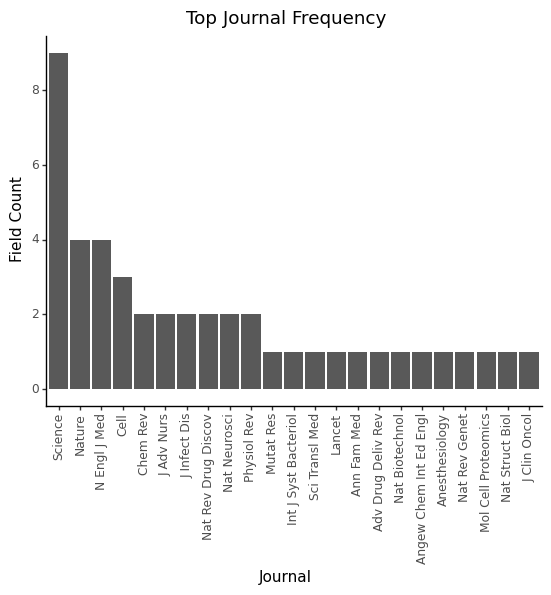

/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../figures/journal_hist.svg


In [42]:
plot = ggplot(top_journal_df, aes(x='cat'))
plot += geom_bar(stat='count')
plot += theme_classic()
plot += theme(axis_text_x=element_text(rotation=90, hjust=.5))
plot += ylab('Field Count')
plot += xlab('Journal')
plot += scale_y_continuous(breaks=list(range(0,10, 2)))
plot += ggtitle('Top Journal Frequency')

ggsave(plot, '../figures/journal_hist.svg')

In [43]:
!inkscape  --export-dpi 200 --export-png=../figures/journal_hist.png ../figures/journal_hist.svg -b "#ffffffff"

DPI: 200
Background RRGGBBAA: ffffffff
Area 0:0:529.487:570.723 exported to 1103 x 1189 pixels (200 dpi)
Bitmap saved as: ../figures/journal_hist.png


## Scratch

In [12]:
heading_str = 'nanotechnology-microscopy'

heading_shuffled = glob(f'../shuffle/{heading_str}*-pagerank.pkl')

doi_to_shuffled_metrics = {}

for path in heading_shuffled:
    with open(path, 'rb') as in_file:
        result = pkl.load(in_file)
        for doi, value in result.items():
            if doi in doi_to_shuffled_metrics:
                doi_to_shuffled_metrics[doi].append(value)
            else:
                doi_to_shuffled_metrics[doi] = [value]
for doi, vals in doi_to_shuffled_metrics.items():
    doi_to_shuffled_metrics[doi] = sorted(vals)

with open(f'../output/{heading_str}-pagerank.pkl', 'rb') as in_file:
    true_vals = pkl.load(in_file)

In [18]:
print(len(heading_shuffled))
doi_of_interest = '10.1126/science.1089389'
true_vals[doi_of_interest]
doi_to_shuffled_metrics[doi]

100


[1.5132861605398747e-05,
 1.5189239647162574e-05,
 1.5316143758420492e-05,
 1.5335114820265175e-05,
 1.592423539000921e-05,
 1.6222335801466083e-05,
 1.71929941921219e-05,
 1.7778195296317148e-05,
 1.800394420051394e-05,
 1.861721983560296e-05,
 1.9548260530104356e-05,
 1.9686353762234913e-05,
 2.0070958994750072e-05,
 2.4723251156796495e-05,
 2.558570698176985e-05,
 2.5777182445646583e-05,
 2.938085680401521e-05,
 3.1977845162932995e-05,
 5.618313362918466e-05]

In [71]:
with open('../nanotechnology-microscopy-11-pagerank.pkl', 'rb') as in_file:
    heading_dict = pkl.load(in_file)
pagerank_df = pd.DataFrame.from_dict(heading_dict, orient='index', columns=['pagerank'])
pagerank_df = pagerank_df.reset_index()
pagerank_df = pagerank_df.rename({'index': 'doi'}, axis='columns')
pagerank_df

,doi,pagerank
0,10.1039/c6cs00632a,0.000014
1,10.1021/nn800364r,0.000014
2,10.1039/b508702c,0.000039
3,10.1016/j.biopha.2021.111623,0.000016
4,10.2174/0929867326666190712154021,0.000017
...,...,...
32689,10.1002/chem.201002835,0.000023
32690,10.1039/c0nr00800a,0.000014
32691,10.1038/nmeth922,0.000132
32692,10.1103/physrevlett.90.120601,0.000025


/home/heil/anaconda3/envs/indices/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 122'. Pick better value with 'binwidth'.


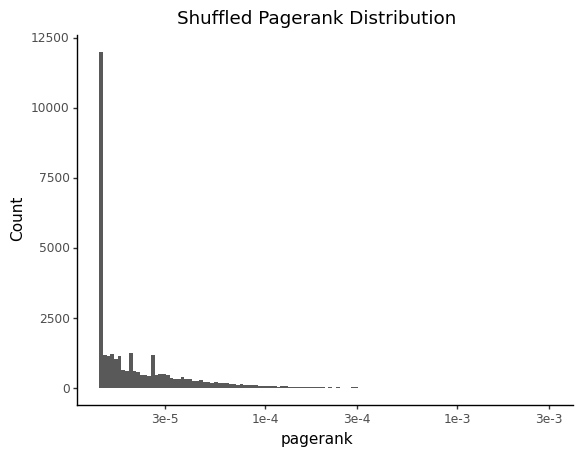

<ggplot: (8740105667152)>

In [72]:
plot = ggplot(pagerank_df, aes(x='pagerank'))
plot += geom_histogram()
plot += scale_x_log10()
plot += scale_y_continuous(name='Count')
plot += ggtitle(f'Shuffled Pagerank Distribution')
plot += theme_classic()
plot
#ggsave(plot, f'../figures/{heading1}-{heading2}-hist.svg')

## Journal sparsity plot